# Idea and theme of the Question - 
The question's main idea is to explore the impact of
Skip Connections in Multi Layer Perceptron networks.



1.   Compare the performance of MLPs with skip connections to those without skip connections.
2.   Analyse multiple different types of skip connections and compare their performance.
3. Perform ablation studies over different characteristics of skip connections
4. BONUS: Attempt to explain, through an experiment of your own, why Skip Con-
nections help or hurt.

# Importing the libraries

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Model
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Input, Add
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

Instanciating the TPU cluster

In [ ]:
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.6.0
Running on TPU  ['10.26.179.154:8470']
INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Initializing the TPU system: grpc://10.26.179.154:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.26.179.154:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
# normalizing images
def normalize_image(train, val ,test):
  # convert from integers to floats
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')
  val_norm = val.astype('float32')
  # normalize to range 0-1
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0
  val_norm = val_norm/ 255.0
  # return normalized images
  return train_norm, val_norm, test_norm

In [ ]:
# declaring callback function
callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=2, verbose=0,
    mode='auto', min_delta=0.00001, cooldown=0, min_lr=0)

# Q1. Vanilla model vs Skip connection

## Results <br>
|  Dataset |  Vanilla Model | Skip connection  | %age Gain  |   |   |   |
|:-:|:-:|:-:|:-:|:-:|---|---|
|  MNIST | 96.67%  | 97.34%  | +0.67%  |   |   |   |
|  CIFAR-10 | 41.30%  | 49.17  | +7.87%  |   |   |   |

So from the results we can see that the model with skip connections, tend to help increase model performance. The reason for such improved performance is that it provides an alternative path during back propagation which kind of helps in cases of vanishing gradients, thus preventing it and helping model perform better

Vanilla (base) Model

In [ ]:
# creating model 
def create_model():
    inputs = Input(shape=(32,32,3))
    input = tf.keras.layers.Flatten(input_shape=(32,32,3))(inputs)
    x = tf.keras.layers.Dense(512, activation=tf.nn.relu)(input)

    w = tf.keras.layers.Dense(256, activation=tf.nn.relu)(x)
    z = tf.keras.layers.Dense(256, activation=tf.nn.relu)(w)
    x = tf.keras.layers.Dense(256, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(256, activation=tf.nn.relu)(x)

    w = tf.keras.layers.Dense(128, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(128, activation=tf.nn.relu)(w)
    x = tf.keras.layers.Dense(128, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(128, activation=tf.nn.relu)(x)

    w = tf.keras.layers.Dense(64, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(64, activation=tf.nn.relu)(w)
    x = tf.keras.layers.Dense(64, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(64, activation=tf.nn.relu)(x)

    w = tf.keras.layers.Dense(32, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(32, activation=tf.nn.relu)(w)
    x = tf.keras.layers.Dense(32, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(32, activation=tf.nn.relu)(x)

    z = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(z)
    model = Model(inputs, z)
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# to run model on tpu
with tpu_strategy.scope():
    model = create_model()

# loading cifar10 dataset
(trainX, trainY),(testX, testY) = cifar10.load_data()

# splitting the training data in training and validation data
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.20, random_state=42)

# normalizing the image
trainX,valX, testX = normalize_image(trainX,valX, testX)
  
# fit model
history = model.fit(trainX, trainY, validation_data=(valX,valY),epochs=50, batch_size=64, verbose=1)


Epoch 1/50
625/625 [==============================] - 17s 18ms/step - loss: 2.1739 - accuracy: 0.1511 - val_loss: 2.0795 - val_accuracy: 0.1828
Epoch 2/50
625/625 [==============================] - 8s 12ms/step - loss: 2.0349 - accuracy: 0.1943 - val_loss: 2.0064 - val_accuracy: 0.1973
Epoch 3/50
625/625 [==============================] - 7s 12ms/step - loss: 1.9881 - accuracy: 0.2101 - val_loss: 1.9849 - val_accuracy: 0.1970
Epoch 4/50
625/625 [==============================] - 7s 12ms/step - loss: 1.9554 - accuracy: 0.2262 - val_loss: 1.9358 - val_accuracy: 0.2263
Epoch 5/50
625/625 [==============================] - 7s 12ms/step - loss: 1.9310 - accuracy: 0.2321 - val_loss: 1.9788 - val_accuracy: 0.2285
Epoch 6/50
625/625 [==============================] - 7s 12ms/step - loss: 1.9211 - accuracy: 0.2442 - val_loss: 1.9217 - val_accuracy: 0.2409
Epoch 7/50
625/625 [==============================] - 7s 11ms/step - loss: 1.8998 - accuracy: 0.2604 - val_loss: 1.9038 - val_accuracy: 0.262

In [ ]:
# evaluating the model
model.evaluate(
    testX, testY, batch_size=64, verbose=1, sample_weight=None, steps=None,
    callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False,
    return_dict=False
)

157/157 [==============================] - 2s 10ms/step - loss: 1.6235 - accuracy: 0.4256


[1.6234586238861084, 0.42559999227523804]

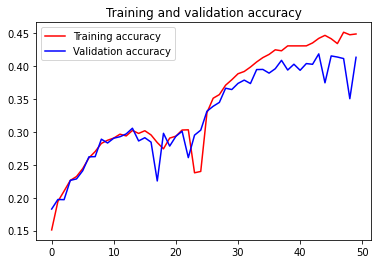

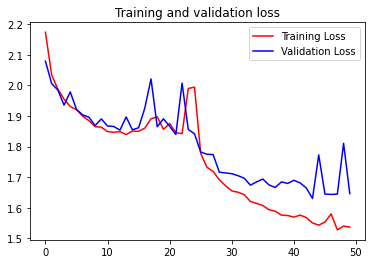

In [ ]:
# plotting the model's training and validation accuracy and loss 
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Simple Skip connection

In [ ]:
# creating model 
def create_model():
    inputs = Input(shape=(32,32,3))
    input = tf.keras.layers.Flatten(input_shape=(32,32,3))(inputs)
    x = tf.keras.layers.Dense(512, activation=tf.nn.relu)(input)

    w = tf.keras.layers.Dense(256, activation=tf.nn.relu)(x)
    z = tf.keras.layers.Dense(256, activation=tf.nn.relu)(w)
    z = Add()([z,w])
    x = tf.keras.layers.Dense(256, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(256, activation=tf.nn.relu)(x)
    z = Add()([z,x])
    z = tf.keras.layers.Dropout(0.3)(z)

    w = tf.keras.layers.Dense(128, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(128, activation=tf.nn.relu)(w)
    z = Add()([z,w])
    x = tf.keras.layers.Dense(128, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(128, activation=tf.nn.relu)(x)
    z = Add()([z,x])
    z = tf.keras.layers.Dropout(0.3)(z)

    w = tf.keras.layers.Dense(64, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(64, activation=tf.nn.relu)(w)
    z = Add()([z,w])
    x = tf.keras.layers.Dense(64, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(64, activation=tf.nn.relu)(x)
    z = Add()([z,x])
    z = tf.keras.layers.Dropout(0.3)(z)

    w = tf.keras.layers.Dense(32, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(32, activation=tf.nn.relu)(w)
    z = Add()([z,w])
    x = tf.keras.layers.Dense(32, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(32, activation=tf.nn.relu)(x)
    z = Add()([z,x])

    z = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(z)
    model = Model(inputs, z)
    model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# to run model on tpu
with tpu_strategy.scope():
    model = create_model()

# loading cifar10 dataset
(trainX, trainY),(testX, testY) = cifar10.load_data()

# splitting the training data in training and validation data
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.33, random_state=42)

# normalizing the image
trainX,valX, testX = normalize_image(trainX,valX, testX)
  
# fit model
history_3 = model.fit(trainX, trainY, validation_data=(valX,valY),epochs=50, batch_size=64, verbose=1,callbacks=[callback])

Epoch 1/50
524/524 [==============================] - 23s 29ms/step - loss: 2.2765 - accuracy: 0.1267 - val_loss: 2.1571 - val_accuracy: 0.1895
Epoch 2/50
524/524 [==============================] - 7s 14ms/step - loss: 2.0623 - accuracy: 0.2027 - val_loss: 1.9719 - val_accuracy: 0.2316
Epoch 3/50
524/524 [==============================] - 8s 14ms/step - loss: 1.9612 - accuracy: 0.2421 - val_loss: 1.8883 - val_accuracy: 0.2698
Epoch 4/50
524/524 [==============================] - 8s 14ms/step - loss: 1.9074 - accuracy: 0.2664 - val_loss: 1.8410 - val_accuracy: 0.2999
Epoch 5/50
524/524 [==============================] - 8s 14ms/step - loss: 1.8626 - accuracy: 0.2830 - val_loss: 1.8144 - val_accuracy: 0.3247
Epoch 6/50
524/524 [==============================] - 8s 14ms/step - loss: 1.8204 - accuracy: 0.3036 - val_loss: 1.7963 - val_accuracy: 0.3245
Epoch 7/50
524/524 [==============================] - 7s 14ms/step - loss: 1.7907 - accuracy: 0.3169 - val_loss: 1.7538 - val_accuracy: 0.333

In [ ]:
# evaluating model
model.evaluate(
    testX, testY, batch_size=64, verbose=1, sample_weight=None, steps=None,
    callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False,
    return_dict=False
)

157/157 [==============================] - 3s 15ms/step - loss: 1.5463 - accuracy: 0.4917


[1.5462599992752075, 0.4916999936103821]

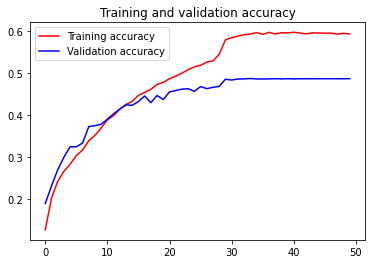

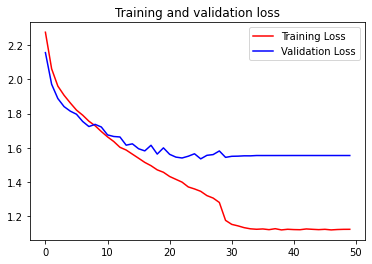

In [ ]:
# plotting the model's training and validation accuracy and loss 
%matplotlib inline
import matplotlib.pyplot as plt
acc = history_3.history['accuracy']
val_acc = history_3.history['val_accuracy']
loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Q2. Different Types of skip connection

|  Dataset 	| Single Skip  	|  Double Skip 	|  Dense Skip 	|   	|   	|   	|
|:-:	|:-:	|:-:	|:-:	|---	|---	|---	|
| MNIST  	|  97.34% 	|  97.54% 	| 96.47%  	|   	|   	|   	|
| CIFAR  	|  49.17% 	| 47.59%  	| 43.15  	|   	|   	|   	|

Reason for this results - We see that the Double skip model performs similar/ or somewhat better than the normal skip connections, this can be accounted to the fact that it may help reduce the vanishing gradient problem more, and help better paths in the backprop graph.
<br>
<br>
It can also be seen that the model which has a lot of skip connections (Dense Skip) performs worse than the single and double skip, as it tends to increase the gradients to an un-required high level, and also causes some of the noise that is ideally filtered to again propagate forward using this skip connections. So after performing these experiments we conclude that, there is a particular threshold untill which we can increase the number of skip connections after which the performance starts to deteriorate 

Code Ahead ->

Double Skip (Better than single skip)

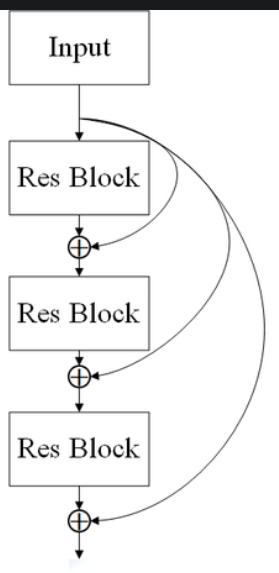

In [ ]:
#creating model
def create_model():
    inputs = Input(shape=(32,32,3))
    input = tf.keras.layers.Flatten(input_shape=(32,32,3))(inputs)
    x = tf.keras.layers.Dense(512, activation=tf.nn.relu)(input)

    w = tf.keras.layers.Dense(256, activation=tf.nn.relu)(x)
    z = tf.keras.layers.Dense(256, activation=tf.nn.relu)(w)
    z = Add()([z,w])
    x = tf.keras.layers.Dense(256, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(256, activation=tf.nn.relu)(x)
    z = Add()([z,w])
    z = tf.keras.layers.Dropout(0.3)(z)

    w = tf.keras.layers.Dense(128, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(128, activation=tf.nn.relu)(w)
    z = Add()([z,w])
    x = tf.keras.layers.Dense(128, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(128, activation=tf.nn.relu)(x)
    z = Add()([z,w])
    z = tf.keras.layers.Dropout(0.3)(z)

    w = tf.keras.layers.Dense(64, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(64, activation=tf.nn.relu)(w)
    z = Add()([z,w])
    x = tf.keras.layers.Dense(64, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(64, activation=tf.nn.relu)(x)
    z = Add()([z,w])
    z = tf.keras.layers.Dropout(0.3)(z)

    w = tf.keras.layers.Dense(32, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(32, activation=tf.nn.relu)(w)
    z = Add()([z,w])
    x = tf.keras.layers.Dense(32, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(32, activation=tf.nn.relu)(x)
    z = Add()([z,w])

    z = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(z)
    model = Model(inputs, z)
    model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# to run model on tpu
with tpu_strategy.scope():
    model = create_model()

# loading cifar10 dataset
(trainX, trainY),(testX, testY) = cifar10.load_data()

# splitting the training data in training and validation data
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.33, random_state=42)

# normalizing the image
trainX,valX, testX = normalize_image(trainX,valX, testX)
  
# fit model
history_2 = model.fit(trainX, trainY,validation_data=(valX,valY), epochs=50, batch_size=64, verbose=1,callbacks=[callback])

Epoch 1/50
524/524 [==============================] - 23s 29ms/step - loss: 2.2197 - accuracy: 0.1546 - val_loss: 2.0113 - val_accuracy: 0.2523
Epoch 2/50
524/524 [==============================] - 8s 14ms/step - loss: 2.0131 - accuracy: 0.2368 - val_loss: 1.8820 - val_accuracy: 0.3199
Epoch 3/50
524/524 [==============================] - 8s 15ms/step - loss: 1.9206 - accuracy: 0.2828 - val_loss: 1.8449 - val_accuracy: 0.3132
Epoch 4/50
524/524 [==============================] - 8s 16ms/step - loss: 1.8613 - accuracy: 0.3117 - val_loss: 1.7781 - val_accuracy: 0.3537
Epoch 5/50
524/524 [==============================] - 8s 15ms/step - loss: 1.8088 - accuracy: 0.3339 - val_loss: 1.7454 - val_accuracy: 0.3575
Epoch 6/50
524/524 [==============================] - 8s 15ms/step - loss: 1.7675 - accuracy: 0.3549 - val_loss: 1.7335 - val_accuracy: 0.3611
Epoch 7/50
524/524 [==============================] - 8s 15ms/step - loss: 1.7272 - accuracy: 0.3734 - val_loss: 1.6510 - val_accuracy: 0.396

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
# evaluting model
model.evaluate(
    testX, testY, batch_size=64, verbose=1, sample_weight=None, steps=None,
    callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False,
    return_dict=False
)

157/157 [==============================] - 3s 15ms/step - loss: 1.4708 - accuracy: 0.4816


[1.4708495140075684, 0.48159998655319214]

In [ ]:
# F1 score
from sklearn.metrics import f1_score
pred_Y = model.predict(testX).argmax(axis=1)
f1_score(testY, pred_Y, average='micro')

0.4816

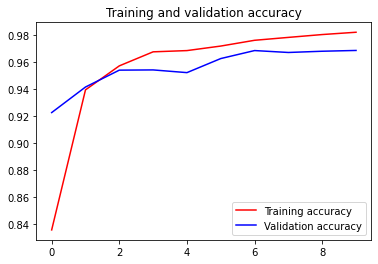

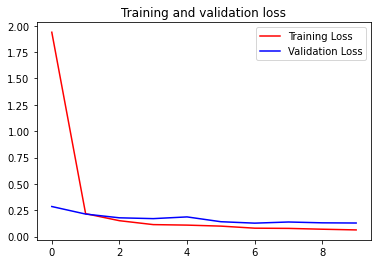

In [ ]:
# plotting the model's training and validation accuracy and loss 
%matplotlib inline
import matplotlib.pyplot as plt
acc = history_3.history['accuracy']
val_acc = history_3.history['val_accuracy']
loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Dense Skip **(Poor performance)**

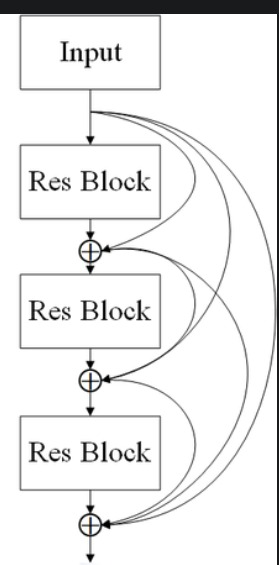

In [ ]:
#create model
def create_model():
    inputs = Input(shape=(32,32,3))
    input = tf.keras.layers.Flatten(input_shape=(32,32,3))(inputs)
    x = tf.keras.layers.Dense(512, activation=tf.nn.relu)(input)

    a = tf.keras.layers.Dense(256, activation=tf.nn.relu)(x)
    b = tf.keras.layers.Dense(256, activation=tf.nn.relu)(a)
    b = Add()([a,b])
    c = tf.keras.layers.Dense(256, activation=tf.nn.relu)(b)
    c = Add()([a,b,c])
    d = tf.keras.layers.Dense(256, activation=tf.nn.relu)(c)
    d = Add()([a,b,c,d])

    a = tf.keras.layers.Dense(128, activation=tf.nn.relu)(d)
    b = tf.keras.layers.Dense(128, activation=tf.nn.relu)(a)
    b = Add()([a,b])
    c = tf.keras.layers.Dense(128, activation=tf.nn.relu)(b)
    c = Add()([a,b,c])
    d = tf.keras.layers.Dense(128, activation=tf.nn.relu)(c)
    d = Add()([a,b,c,d])

    a = tf.keras.layers.Dense(64, activation=tf.nn.relu)(d)
    b = tf.keras.layers.Dense(64, activation=tf.nn.relu)(a)
    b = Add()([a,b])
    c = tf.keras.layers.Dense(64, activation=tf.nn.relu)(b)
    c = Add()([a,b,c])
    d = tf.keras.layers.Dense(64, activation=tf.nn.relu)(c)
    d = Add()([a,b,c,d])

    a = tf.keras.layers.Dense(32, activation=tf.nn.relu)(d)
    b = tf.keras.layers.Dense(32, activation=tf.nn.relu)(a)
    b = Add()([a,b])
    c = tf.keras.layers.Dense(32, activation=tf.nn.relu)(b)
    c = Add()([a,b,c])
    d = tf.keras.layers.Dense(32, activation=tf.nn.relu)(c)
    d = Add()([a,b,c,d])

    z = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(d)
    model = Model(inputs, z)
    model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# to run model on tpu
with tpu_strategy.scope():
    model = create_model()

# loading cifar10 dataset
(trainX, trainY),(testX, testY) = cifar10.load_data()

# splitting the training data in training and validation data
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.33, random_state=42)

# normalizing the image
trainX,valX, testX = normalize_image(trainX,valX, testX)

# fit model
history_3 = model.fit(trainX, trainY, validation_data=(valX,valY),epochs=50, batch_size=64, verbose=1,callbacks=[callback])

Epoch 1/50
524/524 [==============================] - 23s 30ms/step - loss: 8.2481 - accuracy: 0.1887 - val_loss: 2.4551 - val_accuracy: 0.2468
Epoch 2/50
524/524 [==============================] - 7s 14ms/step - loss: 2.1990 - accuracy: 0.2757 - val_loss: 2.0721 - val_accuracy: 0.2975
Epoch 3/50
524/524 [==============================] - 8s 15ms/step - loss: 2.0036 - accuracy: 0.3101 - val_loss: 2.0752 - val_accuracy: 0.3072
Epoch 4/50
524/524 [==============================] - 8s 15ms/step - loss: 1.8884 - accuracy: 0.3378 - val_loss: 1.8102 - val_accuracy: 0.3545
Epoch 5/50
524/524 [==============================] - 8s 15ms/step - loss: 1.8231 - accuracy: 0.3579 - val_loss: 1.8324 - val_accuracy: 0.3541
Epoch 6/50
524/524 [==============================] - 8s 14ms/step - loss: 1.7837 - accuracy: 0.3672 - val_loss: 1.8128 - val_accuracy: 0.3686
Epoch 7/50
524/524 [==============================] - 8s 15ms/step - loss: 1.6005 - accuracy: 0.4356 - val_loss: 1.6720 - val_accuracy: 0.413

In [ ]:
# evalutaing model
model.evaluate(
    testX, testY, batch_size=64, verbose=1, sample_weight=None, steps=None,
    callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False,
    return_dict=False
)

In [ ]:
# F1 score
from sklearn.metrics import f1_score
pred_Y = model.predict(testX).argmax(axis=1)
f1_score(testY, pred_Y, average='micro')

In [ ]:
# plotting the model's training and validation accuracy and loss 
%matplotlib inline
import matplotlib.pyplot as plt
acc = history_3.history['accuracy']
val_acc = history_3.history['val_accuracy']
loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Q.3 Ablation study

|  Dataset 	| Simple skip connection  	|  Reduced skip layers 	|  Changed Activation	|   	|   	|   	|
|:-:	|:-:	|:-:	|:-:	|---	|---	|---	|
| CIFAR  	|  49.17% 	| 47.95%  	| 46.88%  	|   	|   	|   	|

Here we perform 2 ablation study.


1.   Reduce the number of layers skipped, this would help a little but not that much, so we can expect an accuracy in between the full, skip connections and this experiment.
2.   We change the skip connection activation layers from ReLU to y=x, <br>
this makes the gradients, which were intially non-negative, now a chance to be negative, thus hampering the vanishing gradient problem, results here might not be as good as the simple skip connections.



Number of layers skipped

In [ ]:
#creating model
def create_model():
    inputs = Input(shape=(32,32,3))
    input = tf.keras.layers.Flatten(input_shape=(32,32,3))(inputs)
    x = tf.keras.layers.Dense(512, activation=tf.nn.relu)(input)

    w = tf.keras.layers.Dense(256, activation=tf.nn.relu)(x)
    z = tf.keras.layers.Dense(256, activation=tf.nn.relu)(w)
    z = Add()([z,w])
    x = tf.keras.layers.Dense(256, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(256, activation=tf.nn.relu)(x)
    z = Add()([z,x])
    z = tf.keras.layers.Dropout(0.3)(z)

    w = tf.keras.layers.Dense(128, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(128, activation=tf.nn.relu)(w)
    x = tf.keras.layers.Dense(128, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(128, activation=tf.nn.relu)(x)
    z = tf.keras.layers.Dropout(0.3)(z)

    w = tf.keras.layers.Dense(64, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(64, activation=tf.nn.relu)(w)
    x = tf.keras.layers.Dense(64, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(64, activation=tf.nn.relu)(x)
    z = tf.keras.layers.Dropout(0.3)(z)

    w = tf.keras.layers.Dense(32, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(32, activation=tf.nn.relu)(w)
    x = tf.keras.layers.Dense(32, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(32, activation=tf.nn.relu)(x)

    z = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(z)
    model = Model(inputs, z)
    model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# to run model on tpu
with tpu_strategy.scope():
    model = create_model()

# loading cifar10 dataset
(trainX, trainY),(testX, testY) = cifar10.load_data()

# splitting the training data in training and validation data
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.33, random_state=42)

# normalizing the image
trainX,valX, testX = normalize_image(trainX,valX, testX)
  
# fit model
history_4 = model.fit(trainX, trainY, validation_data=(valX,valY),epochs=50, batch_size=64, verbose=1,callbacks=[callback])

Epoch 1/50
524/524 [==============================] - 27s 31ms/step - loss: 2.2268 - accuracy: 0.1379 - val_loss: 2.1348 - val_accuracy: 0.1677
Epoch 2/50
524/524 [==============================] - 8s 16ms/step - loss: 2.0681 - accuracy: 0.1772 - val_loss: 2.0197 - val_accuracy: 0.1859
Epoch 3/50
524/524 [==============================] - 8s 16ms/step - loss: 2.0133 - accuracy: 0.1960 - val_loss: 1.9715 - val_accuracy: 0.2101
Epoch 4/50
524/524 [==============================] - 8s 16ms/step - loss: 1.9537 - accuracy: 0.2290 - val_loss: 1.9033 - val_accuracy: 0.2499
Epoch 5/50
524/524 [==============================] - 8s 16ms/step - loss: 1.9027 - accuracy: 0.2501 - val_loss: 1.8905 - val_accuracy: 0.2585
Epoch 6/50
524/524 [==============================] - 9s 17ms/step - loss: 1.8627 - accuracy: 0.2748 - val_loss: 1.8387 - val_accuracy: 0.2830
Epoch 7/50
524/524 [==============================] - 8s 16ms/step - loss: 1.8284 - accuracy: 0.2879 - val_loss: 1.8187 - val_accuracy: 0.290

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
# evaluating model
model.evaluate(
    testX, testY, batch_size=64, verbose=1, sample_weight=None, steps=None,
    callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False,
    return_dict=False
)

In [ ]:
# plotting the model's training and validation accuracy and loss 
%matplotlib inline
import matplotlib.pyplot as plt
acc = history_4.history['accuracy']
val_acc = history_4.history['val_accuracy']
loss = history_4.history['loss']
val_loss = history_4.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# This shows number of skip connection, also matters and just keeping 1/3 skip connections reduces the performance by 3-4%

Activation of each skipped layer

In [ ]:
#creating model
def create_model():
    inputs = Input(shape=(32,32,3))
    input = tf.keras.layers.Flatten(input_shape=(32,32,3))(inputs)
    x = tf.keras.layers.Dense(512)(input)

    w = tf.keras.layers.Dense(256)(x)
    z = tf.keras.layers.Dense(256)(w)
    z = Add()([z,w])
    x = tf.keras.layers.Dense(256)(z)
    z = tf.keras.layers.Dense(256)(x)
    z = Add()([z,x])
    z = tf.keras.layers.Dropout(0.3)(z)

    w = tf.keras.layers.Dense(128)(z)
    z = tf.keras.layers.Dense(128)(w)
    z = Add()([z,w])
    x = tf.keras.layers.Dense(128)(z)
    z = tf.keras.layers.Dense(128)(x)
    z = Add()([z,x])
    z = tf.keras.layers.Dropout(0.3)(z)

    w = tf.keras.layers.Dense(64)(z)
    z = tf.keras.layers.Dense(64)(w)
    z = Add()([z,w])
    x = tf.keras.layers.Dense(64)(z)
    z = tf.keras.layers.Dense(64)(x)
    z = Add()([z,x])
    z = tf.keras.layers.Dropout(0.3)(z)

    w = tf.keras.layers.Dense(32)(z)
    z = tf.keras.layers.Dense(32)(w)
    z = Add()([z,w])
    x = tf.keras.layers.Dense(32)(z)
    z = tf.keras.layers.Dense(32)(x)
    z = Add()([z,x])

    z = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(z)
    model = Model(inputs, z)
    model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# to run model on tpu
with tpu_strategy.scope():
    model = create_model()

# loading cifar10 dataset
(trainX, trainY),(testX, testY) = cifar10.load_data()

# splitting the training data in training and validation data
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.33, random_state=42)

# normalizing the image
trainX,valX, testX = normalize_image(trainX,valX, testX)
  
# fit model
history_5 = model.fit(trainX, trainY, validation_data=(valX,valY),epochs=50, batch_size=64, verbose=1,callbacks=[callback])

Epoch 1/50
524/524 [==============================] - 23s 29ms/step - loss: 4.3925 - accuracy: 0.1474 - val_loss: 2.1588 - val_accuracy: 0.1963
Epoch 2/50
524/524 [==============================] - 8s 16ms/step - loss: 2.1853 - accuracy: 0.1853 - val_loss: 2.0265 - val_accuracy: 0.2541
Epoch 3/50
524/524 [==============================] - 8s 16ms/step - loss: 2.0718 - accuracy: 0.2244 - val_loss: 1.9639 - val_accuracy: 0.2593
Epoch 4/50
524/524 [==============================] - 8s 16ms/step - loss: 2.0048 - accuracy: 0.2433 - val_loss: 1.9137 - val_accuracy: 0.2789
Epoch 5/50
524/524 [==============================] - 9s 16ms/step - loss: 1.9441 - accuracy: 0.2782 - val_loss: 1.8556 - val_accuracy: 0.3230
Epoch 6/50
524/524 [==============================] - 9s 16ms/step - loss: 1.8890 - accuracy: 0.2996 - val_loss: 1.8078 - val_accuracy: 0.3351
Epoch 7/50
524/524 [==============================] - 9s 18ms/step - loss: 1.8422 - accuracy: 0.3210 - val_loss: 1.7773 - val_accuracy: 0.349

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
#evaluating model
model.evaluate(
    testX, testY, batch_size=64, verbose=1, sample_weight=None, steps=None,
    callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False,
    return_dict=False
)

In [ ]:
# plotting the model's training and validation accuracy and loss 
%matplotlib inline
import matplotlib.pyplot as plt
acc = history_5.history['accuracy']
val_acc = history_5.history['val_accuracy']
loss = history_5.history['loss']
val_loss = history_5.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Q.4 Bonus - Why skip connection helps or hurts

Task - To compare the number of steps needed to reach a particular threshold. This will help us compare the speed till convergence, and how using skip connection helps prevent the vanishing gradient and leads to faster convergence.

## Results <br>
|  Dataset |  Number of epochs to reach 38%
|:-:|:-:
|  Simple Model | 5 epochs  | 
|  Skip connection | 2 epochs  |

### Basic model

In [60]:
def create_model():
    inputs = Input(shape=(32,32,3))
    input = tf.keras.layers.Flatten(input_shape=(32,32,3))(inputs)
    x = tf.keras.layers.Dense(512, activation=tf.nn.relu)(input)

    w = tf.keras.layers.Dense(32, activation=tf.nn.relu)(x)
    z = tf.keras.layers.Dense(32, activation=tf.nn.relu)(w)
    x = tf.keras.layers.Dense(32, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(32, activation=tf.nn.relu)(x)

    z = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(z)
    model = Model(inputs, z)
    return model

(trainX, trainY),(testX, testY) = cifar10.load_data()
trainX,valX, testX = normalize_image(trainX,valX, testX)

scce = tf.keras.losses.SparseCategoricalCrossentropy()

model = create_model()

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(trainX, trainY, validation_data=(testX,testY),epochs=5, batch_size=64, verbose=1)

# model.save('final_model_cifar_with_skip_type2.h5')

Epoch 1/5
782/782 [==============================] - 8s 10ms/step - loss: 2.1092 - accuracy: 0.1870 - val_loss: 1.9542 - val_accuracy: 0.2548
Epoch 2/5
782/782 [==============================] - 6s 8ms/step - loss: 1.9090 - accuracy: 0.2737 - val_loss: 1.9343 - val_accuracy: 0.2958
Epoch 3/5
782/782 [==============================] - 6s 8ms/step - loss: 1.8030 - accuracy: 0.3354 - val_loss: 1.7605 - val_accuracy: 0.3542
Epoch 4/5
782/782 [==============================] - 6s 8ms/step - loss: 1.7301 - accuracy: 0.3684 - val_loss: 1.7032 - val_accuracy: 0.3775
Epoch 5/5
782/782 [==============================] - 6s 8ms/step - loss: 1.6627 - accuracy: 0.3949 - val_loss: 1.6750 - val_accuracy: 0.3870


38.7% accuracy in 5 epochs

### Skip connection

In [61]:
# creating model 
def create_model():
    inputs = Input(shape=(32,32,3))
    input = tf.keras.layers.Flatten(input_shape=(32,32,3))(inputs)
    x = tf.keras.layers.Dense(512, activation=tf.nn.relu)(input)

    w = tf.keras.layers.Dense(256, activation=tf.nn.relu)(x)
    z = tf.keras.layers.Dense(256, activation=tf.nn.relu)(w)
    z = Add()([z,w])
    x = tf.keras.layers.Dense(256, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(256, activation=tf.nn.relu)(x)
    z = Add()([z,x])
    z = tf.keras.layers.Dropout(0.3)(z)

    z = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(z)
    model = Model(inputs, z)
    model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# to run model on tpu
with tpu_strategy.scope():
    model = create_model()

# loading cifar10 dataset
(trainX, trainY),(testX, testY) = cifar10.load_data()

# splitting the training data in training and validation data
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.33, random_state=42)

# normalizing the image
trainX,valX, testX = normalize_image(trainX,valX, testX)
  
# fit model
history_3 = model.fit(trainX, trainY, validation_data=(valX,valY),epochs=5, batch_size=64, verbose=1)

Epoch 1/5
524/524 [==============================] - 18s 25ms/step - loss: 1.9590 - accuracy: 0.2873 - val_loss: 1.7619 - val_accuracy: 0.3757
Epoch 2/5
524/524 [==============================] - 7s 13ms/step - loss: 1.7625 - accuracy: 0.3663 - val_loss: 1.6699 - val_accuracy: 0.4082
Epoch 3/5
524/524 [==============================] - 7s 14ms/step - loss: 1.6693 - accuracy: 0.4070 - val_loss: 1.6152 - val_accuracy: 0.4290
Epoch 4/5
524/524 [==============================] - 7s 13ms/step - loss: 1.6090 - accuracy: 0.4263 - val_loss: 1.5588 - val_accuracy: 0.4421
Epoch 5/5
524/524 [==============================] - 7s 14ms/step - loss: 1.5572 - accuracy: 0.4443 - val_loss: 1.5171 - val_accuracy: 0.4601


# All the above tasks have been repeated for MNIST below.

# MNIST


Vanilla model

In [ ]:
#creating model
def create_model():
    inputs = Input(shape=(28,28))
    input = tf.keras.layers.Flatten(input_shape=(28,28))(inputs)
    x = tf.keras.layers.Dense(512, activation=tf.nn.relu)(input)

    w = tf.keras.layers.Dense(256, activation=tf.nn.relu)(x)
    z = tf.keras.layers.Dense(256, activation=tf.nn.relu)(w)
    x = tf.keras.layers.Dense(256, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(256, activation=tf.nn.relu)(x)

    w = tf.keras.layers.Dense(128, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(128, activation=tf.nn.relu)(w)
    x = tf.keras.layers.Dense(128, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(128, activation=tf.nn.relu)(x)

    w = tf.keras.layers.Dense(64, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(64, activation=tf.nn.relu)(w)
    x = tf.keras.layers.Dense(64, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(64, activation=tf.nn.relu)(x)

    w = tf.keras.layers.Dense(32, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(32, activation=tf.nn.relu)(w)
    x = tf.keras.layers.Dense(32, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(32, activation=tf.nn.relu)(x)

    z = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(z)
    model = Model(inputs, z)
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


# to run model on tpu
with tpu_strategy.scope():
    model = create_model()

# loading cifar10 dataset
(trainX, trainY),(testX, testY) = mnist.load_data()

# splitting the training data in training and validation data
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.33, random_state=42)

# normalizing the image
trainX,valX, testX = normalize_image(trainX,valX, testX)
  
# fit model
history = model.fit(trainX, trainY, validation_data=(valX,valY),epochs=10, batch_size=64, verbose=1)

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/10
629/629 [==============================] - 22s 22ms/step - loss: 0.9849 - accuracy: 0.5947 - val_loss: 0.4562 - val_accuracy: 0.8570
Epoch 2/10
629/629 [==============================] - 8s 13ms/step - loss: 0.3173 - accuracy: 0.9058 - val_loss: 0.2067 - val_accuracy: 0.9478
Epoch 3/10
629/629 [==============================] - 9s 14ms/step - loss: 0.1774 - accuracy: 0.9564 - val_loss: 0.2040 - val_accuracy: 0.9529
Epoch 4/10
629/629 [==============================] - 8s 13ms/step - loss: 0.1842 - accuracy: 0.9555 - val_loss: 0.1820 - val_accuracy: 0.9600
Epoch 5/10
629/629 [==============================] - 8s 13ms/step - loss: 0.1580 - accuracy: 0.9620 - val_loss: 0.1415 - val_accuracy: 0.9667
Epoch 6/10
629/629 [==============================] - 9s 14ms/step - loss: 0.1280 - accuracy: 0.9685 - val_loss: 0.1652 - val_accuracy: 0.9570
Epoch 7/10
629/629 [==============================] - 9s 14ms/step - loss: 0

In [ ]:
#evaluating model
model.evaluate(
    testX, testY, batch_size=64, verbose=1, sample_weight=None, steps=None,
    callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False,
    return_dict=False
)

Simple Skip Connection

In [ ]:
# creating model
def create_model():
    inputs = Input(shape=(28,28))
    input = tf.keras.layers.Flatten(input_shape=(28,28))(inputs)
    x = tf.keras.layers.Dense(512, activation=tf.nn.relu)(input)

    w = tf.keras.layers.Dense(256, activation=tf.nn.relu)(x)
    z = tf.keras.layers.Dense(256, activation=tf.nn.relu)(w)
    z = Add()([z,w])
    x = tf.keras.layers.Dense(256, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(256, activation=tf.nn.relu)(x)
    z = Add()([z,x])
    z = tf.keras.layers.Dropout(0.3)(z)

    w = tf.keras.layers.Dense(128, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(128, activation=tf.nn.relu)(w)
    z = Add()([z,w])
    x = tf.keras.layers.Dense(128, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(128, activation=tf.nn.relu)(x)
    z = Add()([z,x])
    z = tf.keras.layers.Dropout(0.3)(z)

    w = tf.keras.layers.Dense(64, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(64, activation=tf.nn.relu)(w)
    z = Add()([z,w])
    x = tf.keras.layers.Dense(64, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(64, activation=tf.nn.relu)(x)
    z = Add()([z,x])
    z = tf.keras.layers.Dropout(0.3)(z)

    w = tf.keras.layers.Dense(32, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(32, activation=tf.nn.relu)(w)
    z = Add()([z,w])
    x = tf.keras.layers.Dense(32, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(32, activation=tf.nn.relu)(x)
    z = Add()([z,x])

    z = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(z)
    model = Model(inputs, z)
    model.compile(optimizer=tf.keras.optimizers.Adam(5e-4),loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# to run model on tpu
with tpu_strategy.scope():
    model = create_model()

# loading cifar10 dataset
(trainX, trainY),(testX, testY) = mnist.load_data()

# splitting the training data in training and validation data
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.33, random_state=42)

# normalizing the image
trainX,valX, testX = normalize_image(trainX,valX, testX)
  
# fit model
history_3 = model.fit(trainX, trainY, validation_data=(valX,valY),epochs=10, batch_size=64, verbose=1,callbacks=[callback])

Epoch 1/10
629/629 [==============================] - 22s 23ms/step - loss: 0.8618 - accuracy: 0.7042 - val_loss: 0.2584 - val_accuracy: 0.9380
Epoch 2/10
629/629 [==============================] - 9s 14ms/step - loss: 0.2187 - accuracy: 0.9496 - val_loss: 0.1871 - val_accuracy: 0.9543
Epoch 3/10
629/629 [==============================] - 9s 14ms/step - loss: 0.1515 - accuracy: 0.9654 - val_loss: 0.1666 - val_accuracy: 0.9605
Epoch 4/10
629/629 [==============================] - 8s 13ms/step - loss: 0.1165 - accuracy: 0.9727 - val_loss: 0.1426 - val_accuracy: 0.9681
Epoch 5/10
629/629 [==============================] - 9s 14ms/step - loss: 0.0980 - accuracy: 0.9780 - val_loss: 0.1550 - val_accuracy: 0.9669
Epoch 6/10
629/629 [==============================] - 9s 14ms/step - loss: 0.0868 - accuracy: 0.9802 - val_loss: 0.1307 - val_accuracy: 0.9726
Epoch 7/10
629/629 [==============================] - 8s 13ms/step - loss: 0.0738 - accuracy: 0.9833 - val_loss: 0.1334 - val_accuracy: 0.971

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
# evaluating model
model.evaluate(
    testX, testY, batch_size=64, verbose=1, sample_weight=None, steps=None,
    callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False,
    return_dict=False
)

2nd Skip Connection

In [ ]:
# creating model
def create_model():
    inputs = Input(shape=(28,28))
    input = tf.keras.layers.Flatten(input_shape=(28,28))(inputs)
    x = tf.keras.layers.Dense(512, activation=tf.nn.relu)(input)

    w = tf.keras.layers.Dense(256, activation=tf.nn.relu)(x)
    z = tf.keras.layers.Dense(256, activation=tf.nn.relu)(w)
    z = Add()([z,w])
    x = tf.keras.layers.Dense(256, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(256, activation=tf.nn.relu)(x)
    z = Add()([z,w])

    w = tf.keras.layers.Dense(128, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(128, activation=tf.nn.relu)(w)
    z = Add()([z,w])
    x = tf.keras.layers.Dense(128, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(128, activation=tf.nn.relu)(x)
    z = Add()([z,w])

    w = tf.keras.layers.Dense(64, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(64, activation=tf.nn.relu)(w)
    z = Add()([z,w])
    x = tf.keras.layers.Dense(64, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(64, activation=tf.nn.relu)(x)
    z = Add()([z,w])

    w = tf.keras.layers.Dense(32, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(32, activation=tf.nn.relu)(w)
    z = Add()([z,w])
    x = tf.keras.layers.Dense(32, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(32, activation=tf.nn.relu)(x)
    z = Add()([z,w])

    z = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(z)
    model = Model(inputs, z)
    model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# to run model on tpu
with tpu_strategy.scope():
    model = create_model()

# loading cifar10 dataset
(trainX, trainY),(testX, testY) = mnist.load_data()

# splitting the training data in training and validation data
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.33, random_state=42)

# normalizing the image
trainX,valX, testX = normalize_image(trainX,valX, testX)
  
# fit model
history_2 = model.fit(trainX, trainY,validation_data=(valX,valY), epochs=10, batch_size=64, verbose=1,callbacks=[callback])

Epoch 1/10
629/629 [==============================] - 22s 22ms/step - loss: 0.5230 - accuracy: 0.8414 - val_loss: 30.0973 - val_accuracy: 0.9393
Epoch 2/10
629/629 [==============================] - 9s 14ms/step - loss: 0.1701 - accuracy: 0.9506 - val_loss: 23.6889 - val_accuracy: 0.9551
Epoch 3/10
629/629 [==============================] - 9s 14ms/step - loss: 0.1170 - accuracy: 0.9653 - val_loss: 22.5177 - val_accuracy: 0.9594
Epoch 4/10
629/629 [==============================] - 9s 14ms/step - loss: 0.0883 - accuracy: 0.9739 - val_loss: 20.8272 - val_accuracy: 0.9658
Epoch 5/10
629/629 [==============================] - 9s 14ms/step - loss: 0.0658 - accuracy: 0.9800 - val_loss: 20.3229 - val_accuracy: 0.9674
Epoch 6/10
629/629 [==============================] - 9s 14ms/step - loss: 0.0511 - accuracy: 0.9848 - val_loss: 24.9536 - val_accuracy: 0.9634
Epoch 7/10
629/629 [==============================] - 9s 14ms/step - loss: 0.0396 - accuracy: 0.9881 - val_loss: 20.8204 - val_accuracy

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
# evaluating model
model.evaluate(
    testX, testY, batch_size=64, verbose=1, sample_weight=None, steps=None,
    callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False,
    return_dict=False
)

Complex Skip Connection

In [ ]:
# creating model
def create_model():
    inputs = Input(shape=(28,28))
    input = tf.keras.layers.Flatten(input_shape=(28,28))(inputs)
    x = tf.keras.layers.Dense(512, activation=tf.nn.relu)(input)

    a = tf.keras.layers.Dense(256, activation=tf.nn.relu)(x)
    b = tf.keras.layers.Dense(256, activation=tf.nn.relu)(a)
    b = Add()([a,b])
    c = tf.keras.layers.Dense(256, activation=tf.nn.relu)(b)
    c = Add()([a,b,c])
    d = tf.keras.layers.Dense(256, activation=tf.nn.relu)(c)
    d = Add()([a,b,c,d])

    a = tf.keras.layers.Dense(128, activation=tf.nn.relu)(d)
    b = tf.keras.layers.Dense(128, activation=tf.nn.relu)(a)
    b = Add()([a,b])
    c = tf.keras.layers.Dense(128, activation=tf.nn.relu)(b)
    c = Add()([a,b,c])
    d = tf.keras.layers.Dense(128, activation=tf.nn.relu)(c)
    d = Add()([a,b,c,d])

    a = tf.keras.layers.Dense(64, activation=tf.nn.relu)(d)
    b = tf.keras.layers.Dense(64, activation=tf.nn.relu)(a)
    b = Add()([a,b])
    c = tf.keras.layers.Dense(64, activation=tf.nn.relu)(b)
    c = Add()([a,b,c])
    d = tf.keras.layers.Dense(64, activation=tf.nn.relu)(c)
    d = Add()([a,b,c,d])

    a = tf.keras.layers.Dense(32, activation=tf.nn.relu)(d)
    b = tf.keras.layers.Dense(32, activation=tf.nn.relu)(a)
    b = Add()([a,b])
    c = tf.keras.layers.Dense(32, activation=tf.nn.relu)(b)
    c = Add()([a,b,c])
    d = tf.keras.layers.Dense(32, activation=tf.nn.relu)(c)
    d = Add()([a,b,c,d])

    z = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(d)
    model = Model(inputs, z)
    model.compile(optimizer=tf.keras.optimizers.Adam(5e-4),loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# to run model on tpu
with tpu_strategy.scope():
    model = create_model()

# loading cifar10 dataset
(trainX, trainY),(testX, testY) = mnist.load_data()

# splitting the training data in training and validation data
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.20, random_state=42)

# normalizing the image
trainX,valX, testX = normalize_image(trainX,valX, testX)

# fit model
history_3 = model.fit(trainX, trainY, validation_data=(valX,valY),epochs=10, batch_size=64, verbose=1,callbacks=[callback])

Epoch 1/10
750/750 [==============================] - 18s 15ms/step - loss: 1.9386 - accuracy: 0.8356 - val_loss: 0.2852 - val_accuracy: 0.9225
Epoch 2/10
750/750 [==============================] - 8s 11ms/step - loss: 0.2174 - accuracy: 0.9393 - val_loss: 0.2136 - val_accuracy: 0.9414
Epoch 3/10
750/750 [==============================] - 8s 11ms/step - loss: 0.1507 - accuracy: 0.9571 - val_loss: 0.1781 - val_accuracy: 0.9539
Epoch 4/10
750/750 [==============================] - 8s 11ms/step - loss: 0.1136 - accuracy: 0.9675 - val_loss: 0.1703 - val_accuracy: 0.9541
Epoch 5/10
750/750 [==============================] - 8s 11ms/step - loss: 0.1088 - accuracy: 0.9684 - val_loss: 0.1866 - val_accuracy: 0.9521
Epoch 6/10
750/750 [==============================] - 8s 11ms/step - loss: 0.0992 - accuracy: 0.9717 - val_loss: 0.1410 - val_accuracy: 0.9625
Epoch 7/10
750/750 [==============================] - 8s 11ms/step - loss: 0.0797 - accuracy: 0.9760 - val_loss: 0.1275 - val_accuracy: 0.968

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
# evaluating model
model.evaluate(
    testX, testY, batch_size=64, verbose=1, sample_weight=None, steps=None,
    callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False,
    return_dict=False
)

157/157 [==============================] - 3s 15ms/step - loss: 0.1395 - accuracy: 0.9647


[0.13954944908618927, 0.9646999835968018]

Ablation study

Number of layers skipped

In [ ]:
#creating model
def create_model():
    inputs = Input(shape=(28,28))
    input = tf.keras.layers.Flatten(input_shape=(28,28))(inputs)
    x = tf.keras.layers.Dense(512, activation=tf.nn.relu)(input)

    w = tf.keras.layers.Dense(256, activation=tf.nn.relu)(x)
    z = tf.keras.layers.Dense(256, activation=tf.nn.relu)(w)
    z = Add()([z,w])
    x = tf.keras.layers.Dense(256, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(256, activation=tf.nn.relu)(x)
    z = Add()([z,x])
    z = tf.keras.layers.Dropout(0.3)(z)

    w = tf.keras.layers.Dense(128, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(128, activation=tf.nn.relu)(w)
    x = tf.keras.layers.Dense(128, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(128, activation=tf.nn.relu)(x)
    z = tf.keras.layers.Dropout(0.3)(z)

    w = tf.keras.layers.Dense(64, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(64, activation=tf.nn.relu)(w)
    x = tf.keras.layers.Dense(64, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(64, activation=tf.nn.relu)(x)
    z = tf.keras.layers.Dropout(0.3)(z)

    w = tf.keras.layers.Dense(32, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(32, activation=tf.nn.relu)(w)
    x = tf.keras.layers.Dense(32, activation=tf.nn.relu)(z)
    z = tf.keras.layers.Dense(32, activation=tf.nn.relu)(x)

    z = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(z)
    model = Model(inputs, z)
    model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# to run model on tpu
with tpu_strategy.scope():
    model = create_model()

# loading cifar10 dataset
(trainX, trainY),(testX, testY) = mnist.load_data()

# splitting the training data in training and validation data
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.33, random_state=42)

# normalizing the image
trainX,valX, testX = normalize_image(trainX,valX, testX)
  
# fit model
history_4 = model.fit(trainX, trainY, validation_data=(valX,valY),epochs=50, batch_size=64, verbose=1,callbacks=[callback])

Epoch 1/50
524/524 [==============================] - 27s 31ms/step - loss: 2.2268 - accuracy: 0.1379 - val_loss: 2.1348 - val_accuracy: 0.1677
Epoch 2/50
524/524 [==============================] - 8s 16ms/step - loss: 2.0681 - accuracy: 0.1772 - val_loss: 2.0197 - val_accuracy: 0.1859
Epoch 3/50
524/524 [==============================] - 8s 16ms/step - loss: 2.0133 - accuracy: 0.1960 - val_loss: 1.9715 - val_accuracy: 0.2101
Epoch 4/50
524/524 [==============================] - 8s 16ms/step - loss: 1.9537 - accuracy: 0.2290 - val_loss: 1.9033 - val_accuracy: 0.2499
Epoch 5/50
524/524 [==============================] - 8s 16ms/step - loss: 1.9027 - accuracy: 0.2501 - val_loss: 1.8905 - val_accuracy: 0.2585
Epoch 6/50
524/524 [==============================] - 9s 17ms/step - loss: 1.8627 - accuracy: 0.2748 - val_loss: 1.8387 - val_accuracy: 0.2830
Epoch 7/50
524/524 [==============================] - 8s 16ms/step - loss: 1.8284 - accuracy: 0.2879 - val_loss: 1.8187 - val_accuracy: 0.290

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
# evaluating model
model.evaluate(
    testX, testY, batch_size=64, verbose=1, sample_weight=None, steps=None,
    callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False,
    return_dict=False
)

In [ ]:
# plotting the model's training and validation accuracy and loss 
%matplotlib inline
import matplotlib.pyplot as plt
acc = history_4.history['accuracy']
val_acc = history_4.history['val_accuracy']
loss = history_4.history['loss']
val_loss = history_4.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# This shows number of skip connection, also matters and just keeping 1/3 skip connections reduces the performance by 3-4%

Activation of each skipped layer

In [ ]:
#creating model
def create_model():
    inputs = Input(shape=(28,28))
    input = tf.keras.layers.Flatten(input_shape=(28,28))(inputs)
    x = tf.keras.layers.Dense(512)(input)

    w = tf.keras.layers.Dense(256)(x)
    z = tf.keras.layers.Dense(256)(w)
    z = Add()([z,w])
    x = tf.keras.layers.Dense(256)(z)
    z = tf.keras.layers.Dense(256)(x)
    z = Add()([z,x])
    z = tf.keras.layers.Dropout(0.3)(z)

    w = tf.keras.layers.Dense(128)(z)
    z = tf.keras.layers.Dense(128)(w)
    z = Add()([z,w])
    x = tf.keras.layers.Dense(128)(z)
    z = tf.keras.layers.Dense(128)(x)
    z = Add()([z,x])
    z = tf.keras.layers.Dropout(0.3)(z)

    w = tf.keras.layers.Dense(64)(z)
    z = tf.keras.layers.Dense(64)(w)
    z = Add()([z,w])
    x = tf.keras.layers.Dense(64)(z)
    z = tf.keras.layers.Dense(64)(x)
    z = Add()([z,x])
    z = tf.keras.layers.Dropout(0.3)(z)

    w = tf.keras.layers.Dense(32)(z)
    z = tf.keras.layers.Dense(32)(w)
    z = Add()([z,w])
    x = tf.keras.layers.Dense(32)(z)
    z = tf.keras.layers.Dense(32)(x)
    z = Add()([z,x])

    z = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(z)
    model = Model(inputs, z)
    model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# to run model on tpu
with tpu_strategy.scope():
    model = create_model()

# loading cifar10 dataset
(trainX, trainY),(testX, testY) = mnist.load_data()

# splitting the training data in training and validation data
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.33, random_state=42)

# normalizing the image
trainX,valX, testX = normalize_image(trainX,valX, testX)
  
# fit model
history_5 = model.fit(trainX, trainY, validation_data=(valX,valY),epochs=50, batch_size=64, verbose=1,callbacks=[callback])

Epoch 1/50
524/524 [==============================] - 23s 29ms/step - loss: 4.3925 - accuracy: 0.1474 - val_loss: 2.1588 - val_accuracy: 0.1963
Epoch 2/50
524/524 [==============================] - 8s 16ms/step - loss: 2.1853 - accuracy: 0.1853 - val_loss: 2.0265 - val_accuracy: 0.2541
Epoch 3/50
524/524 [==============================] - 8s 16ms/step - loss: 2.0718 - accuracy: 0.2244 - val_loss: 1.9639 - val_accuracy: 0.2593
Epoch 4/50
524/524 [==============================] - 8s 16ms/step - loss: 2.0048 - accuracy: 0.2433 - val_loss: 1.9137 - val_accuracy: 0.2789
Epoch 5/50
524/524 [==============================] - 9s 16ms/step - loss: 1.9441 - accuracy: 0.2782 - val_loss: 1.8556 - val_accuracy: 0.3230
Epoch 6/50
524/524 [==============================] - 9s 16ms/step - loss: 1.8890 - accuracy: 0.2996 - val_loss: 1.8078 - val_accuracy: 0.3351
Epoch 7/50
524/524 [==============================] - 9s 18ms/step - loss: 1.8422 - accuracy: 0.3210 - val_loss: 1.7773 - val_accuracy: 0.349

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
#evaluating model
model.evaluate(
    testX, testY, batch_size=64, verbose=1, sample_weight=None, steps=None,
    callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False,
    return_dict=False
)

In [ ]:
# plotting the model's training and validation accuracy and loss 
%matplotlib inline
import matplotlib.pyplot as plt
acc = history_5.history['accuracy']
val_acc = history_5.history['val_accuracy']
loss = history_5.history['loss']
val_loss = history_5.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Name of Authors and their contribution

In [63]:
NAME = "Shrey N Pandit"
ID = "2019A7PS0138G"
Contribution = "Performed the ablation studies and the Bonus part, fintuning of the code and documentation"

In [64]:
NAME = "Jatin Singh"
ID = "2019A7PS0085G"
Contribution = "Coded up the Vanilla, Double skip connections, helped in model training and finetuning."

In [65]:
NAME = "Rachit Jain"
ID = "2019A7PS0140G"
Contribution = "Coded up the Complex skip connections, documented the code, and the MNIST code for the tasks."

### Disclaimer :  We all did all the things together, just splitted the work, and helped each other with solving the bugs 🙂